In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from PLA import PlaPocket
from Regressao_Logistica import RegressaoLogistica
from regressao_linear import RegressaoLinear
import numpy as np
import funcoes as f

### Dados Completos de Treino e de Teste dos Dígitos 0, 1, 4 e 5

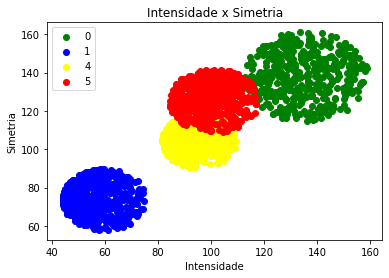

In [32]:
train = pd.read_csv('Dados/train_reduzido.csv', sep=";")
test = pd.read_csv('Dados/test_reduzido.csv', sep=";")


# Separando os dados por classe
train_0 = train[train['label'] == 0]
train_1 = train[train['label'] == 1]
train_4 = train[train['label'] == 4]
train_5 = train[train['label'] == 5]

# Plotando os pontos para cada classe com cores diferentes e legendas
plt.scatter(train_0["intensidade"], train_0["simetria"], c='green', label='0')
plt.scatter(train_1["intensidade"], train_1["simetria"], c='blue', label='1')
plt.scatter(train_4["intensidade"], train_4["simetria"], c='yellow', label='4')
plt.scatter(train_5["intensidade"], train_5["simetria"], c='red', label='5')

plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.title("Intensidade x Simetria")
plt.legend()
plt.show()

### Preparação dos Dados Para o Treino e Teste

In [33]:
X = train[['intensidade', 'simetria']].values
y_train = train['label'].values

X_train, paramentros = f.padronizar(X)

X_test = test[['intensidade', 'simetria']].values
y_test = test['label'].values

X_test, paramentros = f.padronizar(X_test, paramentros)

### Treinando o Modelo PLA Para Todos os Dígitos

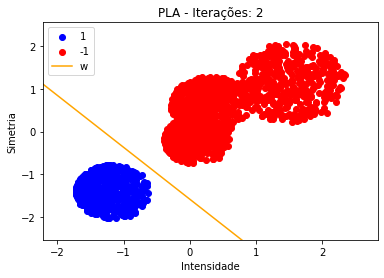

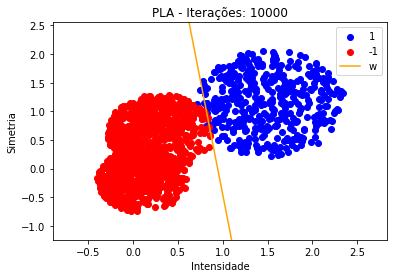

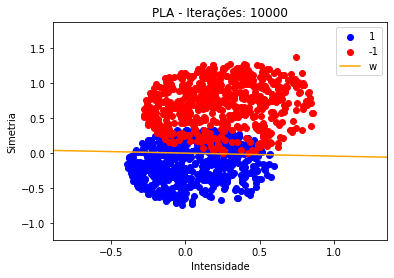

In [34]:
y_ = y_train.copy()
X_ = X_train.copy()
modelos_pla = []
for i in (1, 0, 4):
    y_binary = np.where(y_ == i, 1, -1)
    pla = PlaPocket(X_, y_binary)
    pla.fit()
    pla.plot()
    
    y_pred = pla.predict(X_)
    lista_index = np.where(y_pred == 1)[0]

    y_ = np.delete(y_, lista_index, axis=0)
    X_ = np.delete(X_, lista_index, axis=0)

    modelos_pla.append(pla)

### Treinando o Modelo Regressão Linear Para Todos os Dígitos

(2186, 2)


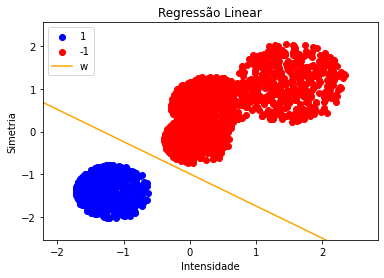

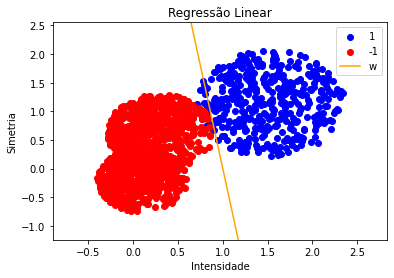

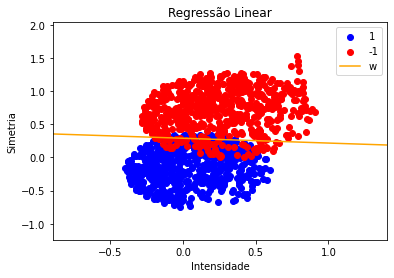

In [35]:
y_ = y_train.copy()
X_ = X_train.copy()
print(X_.shape)
modelos_rlin = []
for i in (1, 0, 4):
    y_binary = np.where(y_ == i, 1, -1)
    rlin = RegressaoLinear(X_, y_binary)
    rlin.fit()
    rlin.plot()
    
    y_pred = rlin.predict(X_)
    lista_index = np.where(y_pred == 1)[0]

    y_ = np.delete(y_, lista_index, axis=0)
    X_ = np.delete(X_, lista_index, axis=0)

    modelos_rlin.append(rlin)

### Treinando o Modelo Regressão Logística Para Todos os Dígitos

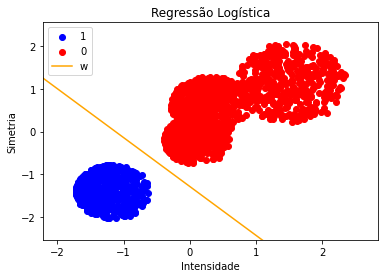

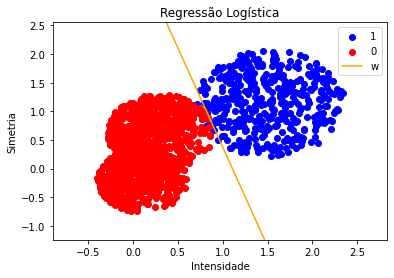

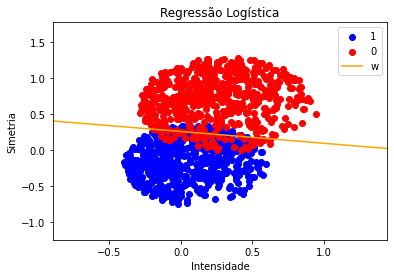

In [36]:
y_ = y_train.copy()
X_ = X_train.copy()
modelos_rlog = []
for i in (1, 0, 4):
    y_binary = np.where(y_ == i, 1, 0)
    rlog = RegressaoLogistica(X_, y_binary)
    rlog.fit()
    rlog.plot()
    
    y_pred = rlog.predict(X_)
    lista_index = np.where(y_pred == 1)[0]

    y_ = np.delete(y_, lista_index, axis=0)
    X_ = np.delete(X_, lista_index, axis=0)

    modelos_rlog.append(rlog)
    

### Verificando acuracia do PLA com dados de teste


Acurácia PLA
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       218
           1       1.00      1.00      1.00       292
           4       0.99      0.68      0.80       314
           5       0.73      0.98      0.84       291

    accuracy                           0.90      1115
   macro avg       0.93      0.91      0.91      1115
weighted avg       0.92      0.90      0.90      1115



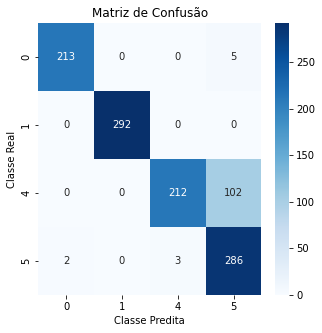

In [37]:
# um contra todos usando PLA
y_predict = []
for imagem in X_test:
    if modelos_pla[0].predict(imagem) == 1:
        y_predict.append(1)
    elif modelos_pla[1].predict(imagem) == 1:
        y_predict.append(0)
    elif modelos_pla[2].predict(imagem) == 1:
        y_predict.append(4)
    else:
        y_predict.append(5)

y_predict = np.array(y_predict)

modelos_pla[0].acuracia(y_test, y_predict, ['0', '1', '4', '5'])



Acurácia Regressão Linear
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       218
           1       1.00      1.00      1.00       292
           4       0.93      0.97      0.95       314
           5       0.93      0.92      0.93       291

    accuracy                           0.96      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.96      0.96      0.96      1115



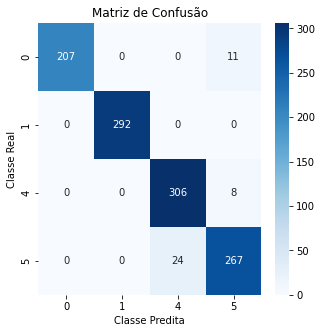

In [38]:
# um contra todos usando regressão linear
y_predict = []
for imagem in X_test:
    if modelos_rlin[0].predict(imagem) == 1:
        y_predict.append(1)
    elif modelos_rlin[1].predict(imagem) == 1:
        y_predict.append(0)
    elif modelos_rlin[2].predict(imagem) == 1:
        y_predict.append(4)
    else:
        y_predict.append(5)

y_predict = np.array(y_predict)

modelos_rlin[0].acuracia(y_test, y_predict, ['0', '1', '4', '5'])


Acurácia Regressão Logística
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       218
           1       1.00      1.00      1.00       292
           4       0.94      0.95      0.94       314
           5       0.93      0.93      0.93       291

    accuracy                           0.97      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.97      0.97      0.97      1115



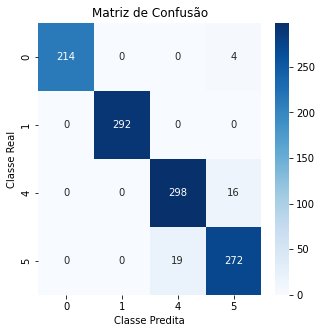

In [39]:
# um contra todos usando regressão logística
y_predict = []
for imagem in X_test:
    if modelos_rlog[0].predict(imagem) == 1:
        y_predict.append(1)
    elif modelos_rlog[1].predict(imagem) == 1:
        y_predict.append(0)
    elif modelos_rlog[2].predict(imagem) == 1:
        y_predict.append(4)
    else:
        y_predict.append(5)

y_predict = np.array(y_predict)

modelos_rlog[0].acuracia(y_test, y_predict, ['0', '1', '4', '5'])